In [142]:
# HW 1: How do you remove duplicate values in a dataset in Python?

In [143]:
# Remove duplicate data for a numpy array
import numpy as np
array = np.array([1,2,2,3,5,5,7])
print(array)

array_dedupe = np.unique(array)
print(array_dedupe)

[1 2 2 3 5 5 7]
[1 2 3 5 7]


In [144]:
# Remove duplicate rows for a dataframe
import pandas as pd
df = pd.DataFrame([[1,1,3],[2,2,4],[2,2,4]])
df

,0,1,2
0,1,1,3
1,2,2,4
2,2,2,4


In [145]:
df_dedupe = df.drop_duplicates()
df_dedupe

,0,1,2
0,1,1,3
1,2,2,4


In [146]:
# Remove duplicate columns for the dataframe
df.T.drop_duplicates().T

,0,2
0,1,3
1,2,4
2,2,4


In [147]:
# HW 2: frind request
import pandas as pd
friend_request = pd.DataFrame(
    {'receiver_id':[201,202,203],
     'requester_id':[101,102,103],
     'time':['2017-01-01','2017-01-02','2017-01-03']})

request_accepted = pd.DataFrame(
    {'requester_id':[101,103],
     'time':['2017-01-01','2017-01-04'],
     'acceptor_id':[201,203]})

print(friend_request)
print(request_accepted)

   receiver_id  requester_id        time
0          201           101  2017-01-01
1          202           102  2017-01-02
2          203           103  2017-01-03
   acceptor_id  requester_id        time
0          201           101  2017-01-01
1          203           103  2017-01-04


In [148]:
# SQL
# select count(if(ra.acceptor_id is null,'yes','no')='no')/count(*) as acceptance_rate 
# from friend_request fq left join request_accepted ra 
# on fq.requester_id = ra.requester_id
# and fq.receiver_id = ra.acceptor_id; 

merged_table = pd.merge(friend_request,request_accepted,how='left', left_on= ['requester_id','receiver_id'],
                       right_on=['requester_id','acceptor_id'])
merged_table

,receiver_id,requester_id,time_x,acceptor_id,time_y
0,201,101,2017-01-01,201.0,2017-01-01
1,202,102,2017-01-02,NaN,NaN
2,203,103,2017-01-03,203.0,2017-01-04


In [149]:
acceptance_rate = len(merged_table['acceptor_id'][merged_table.acceptor_id>0])/len(merged_table)
print(acceptance_rate)

0.6666666666666666


In [150]:
# HW 3: Credit Card Categorization

def isser_detector(cc): 
    if (cc[0:2]=='34'or'37') and (len(cc)==15):
        print('AMEX')
    if (cc[0:2]=='36') and (len(cc)==14):
        print('Diners Club')
    if (cc[0:1]=='4') and (len(cc)==16):
        if(cc[0:4]=='4026'or'4405'or'4508'or'4844'or'4913'or'4917') or (cc[0:6]=='417500'):
            print('VISAELECTRON')
        else:
            print('VISA')
    else: 
        return "NA"

In [151]:
isser_detector("4175004175004172")

VISAELECTRON


In [40]:
# HW 4: PrintCumulativeTimeSeries()
import pandas as pd

file_location = "/Users/MengyangMa/Desktop/"
file_name = "BA501_python_data.csv"
my_data = pd.read_csv(file_location + file_name) 
my_data.head()

,country,date,experiment_id,order_id,spend_usd,user_id,vertical
0,JP,20170402,12624548,5813140433216629693,16.138855,5006730028073359543,ANDROID_APPS
1,US,20170403,12624549,16333056276711034931,9.990000,5938685669571545259,ANDROID_APPS
2,JP,20170404,12624548,11227119161741298366,19.887087,17623708458399141713,ANDROID_APPS
3,US,20170403,12624548,11927299833124210932,19.990000,18042812344456618148,ANDROID_APPS
4,JP,20170403,12624549,11644727017708872749,88.220093,4325104700699531031,ANDROID_APPS


In [62]:
import numpy as np
experiment_id = np.unique(my_data['experiment_id'])[0]
control_id = np.unique(my_data['experiment_id'])[1]
experiment_id, control_id

(12624548, 12624549)

In [63]:
# deal with date format 
my_data.date = pd.to_datetime(my_data.date, format='%Y%m%d')
my_data.head()

,country,date,experiment_id,order_id,spend_usd,user_id,vertical
0,JP,2017-04-02,12624548,5813140433216629693,16.138855,5006730028073359543,ANDROID_APPS
1,US,2017-04-03,12624549,16333056276711034931,9.990000,5938685669571545259,ANDROID_APPS
2,JP,2017-04-04,12624548,11227119161741298366,19.887087,17623708458399141713,ANDROID_APPS
3,US,2017-04-03,12624548,11927299833124210932,19.990000,18042812344456618148,ANDROID_APPS
4,JP,2017-04-03,12624549,11644727017708872749,88.220093,4325104700699531031,ANDROID_APPS


In [94]:
# function 1: for any given experiment_id, return its cumulative sum of spends group by date
def GetCumulativeSeries(my_data, my_id, my_country, my_vertical):
    table = my_data[['date', 'spend_usd']][(my_data.experiment_id == my_id) & (my_data.country == my_country) 
                                           & (my_data.vertical == my_vertical)]
    series = table.groupby('date')['spend_usd'].sum()
    series = np.cumsum(series)
    total_revenue = series[-1]   # extract the last value in the cumsum
    return(series, total_revenue)

In [95]:
# function 2: for any two series, plot their time series 
import matplotlib.pyplot as plt
%matplotlib inline

def PlotCumulativeSeries(experiment_series, control_series):
    fig, ax = plt.subplots()
    ax.plot(experiment_series, c='red', label='experiment')
    ax.plot(control_series, c='blue', label='control')   
    ax.set_title("Red vs Blue")
    ax.set_ylabel("Total Spend")
    ax.grid(True, which='both')     
    ax.legend()
    plt.gcf().autofmt_xdate()

In [96]:
# master function: 
def PrintCumulativeTimeSeries(my_data, experiment_ids, my_country, my_vertical):
    # make sure our x-axis is consistent
    index_series = np.unique(my_data.date) # unique date
    index_series = np.sort(index_series) # sort by date
    
    # data grouping
    my_data = my_data.sort_values("date", ascending=True, inplace=False)
    experiment_series = GetCumulativeSeries(my_data, experiment_ids[0],my_country, my_vertical)[0]
    experiment_revenue = GetCumulativeSeries(my_data, experiment_ids[0],my_country, my_vertical)[1]
    control_series = GetCumulativeSeries(my_data, experiment_ids[1], my_country, my_vertical)[0]
    control_revenue = GetCumulativeSeries(my_data, experiment_ids[1], my_country, my_vertical)[1]
    
    print("Cumulative Revenue Impact: " + str(experiment_revenue/control_revenue*100-100) + "%")
    PlotCumulativeSeries(experiment_series, control_series)

Cumulative Revenue Impact: -4.35272685443%


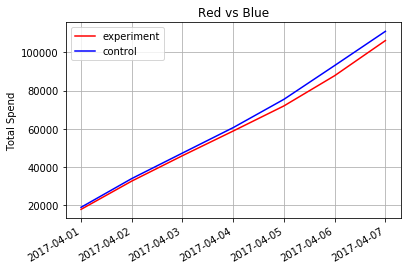

In [97]:
PrintCumulativeTimeSeries(my_data, [12624548, 12624549], "US", "ANDROID_APPS")